# House Price Predictor

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, we will attempt to predict the final price of each home.

**Evaluation:**

Submission are evaluated on Root Mean Squared Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale = 1.2)
%matplotlib inline

In [2]:
data = pd.read_csv('house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('house-prices-advanced-regression-techniques/test.csv')

In [3]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
data.shape

(1460, 81)

In [5]:
data['Street'].value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

In [6]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
test['YrSold'].value_counts()

2007    363
2008    318
2009    309
2006    305
2010    164
Name: YrSold, dtype: int64

In [8]:
data['YrSold'].value_counts()

2009    338
2007    329
2006    314
2008    304
2010    175
Name: YrSold, dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [10]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [11]:
data['Alley'].value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [12]:
data['PoolArea'].value_counts()

0      1453
738       1
648       1
576       1
555       1
519       1
512       1
480       1
Name: PoolArea, dtype: int64

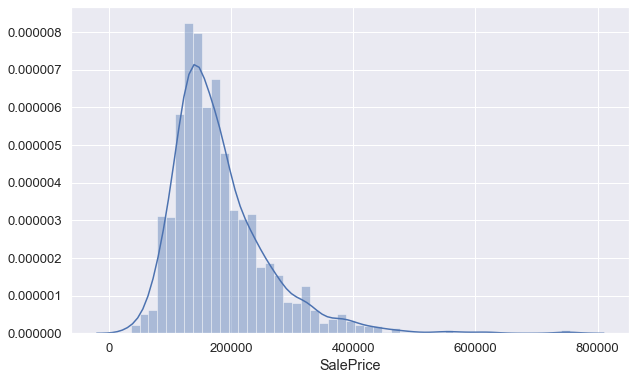

In [13]:
plt.figure(figsize = (10,6))
sns.distplot(data['SalePrice']);

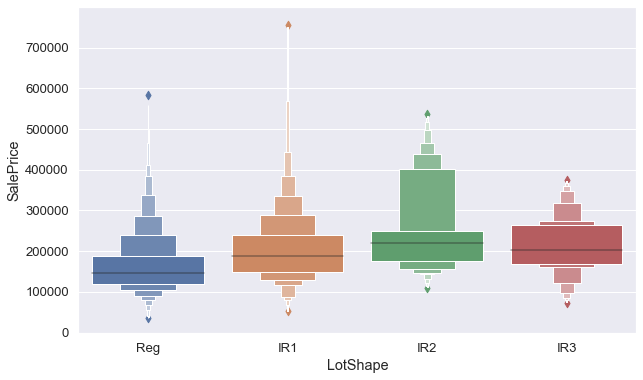

In [14]:
plt.figure(figsize = (10,6))
sns.boxenplot(x = 'LotShape', y = 'SalePrice', data = data);

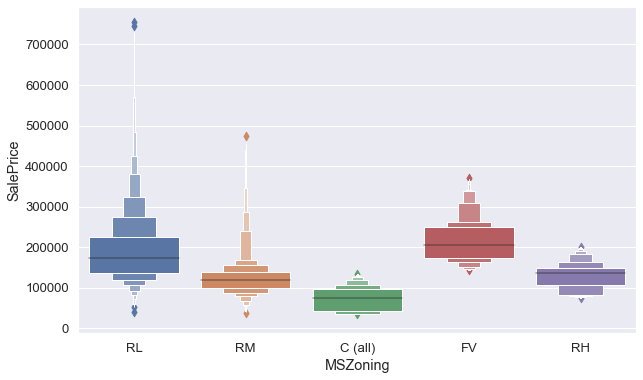

In [15]:
plt.figure(figsize = (10,6))
sns.boxenplot(x = 'MSZoning', y = 'SalePrice', data = data);

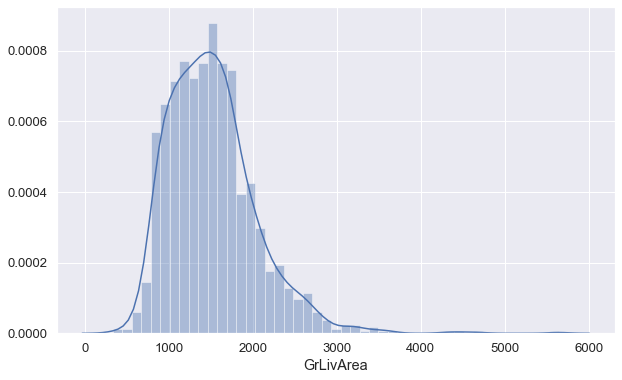

In [16]:
plt.figure(figsize = (10,6))
sns.distplot(data['GrLivArea']);

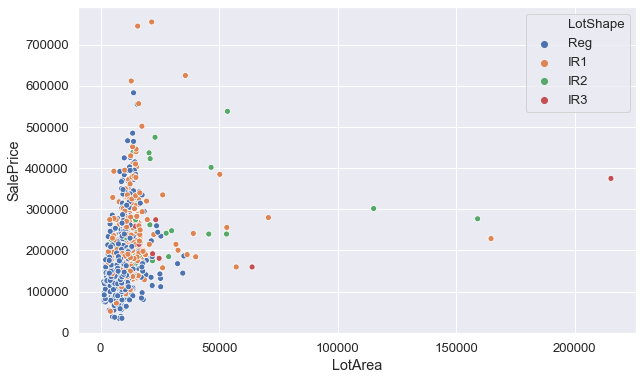

In [17]:
plt.figure(figsize = (10,6))
#plt.scatter(data['LotArea'], data['SalePrice'])
sns.scatterplot(x = 'LotArea', y = 'SalePrice', hue = 'LotShape', data = data);

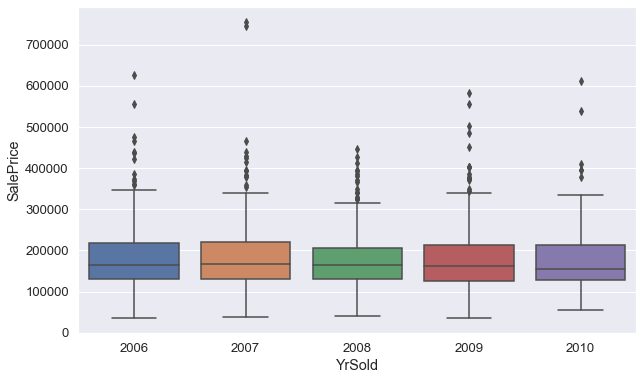

In [18]:
plt.figure(figsize = (10,6))
sns.boxplot(x = 'YrSold', y = 'SalePrice', data = data);

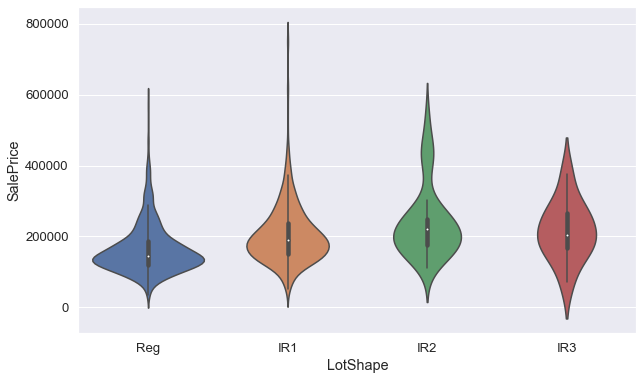

In [19]:
plt.figure(figsize = (10,6))
sns.violinplot(x = 'LotShape', y = 'SalePrice', data = data);

In [20]:
data = pd.read_csv('house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('house-prices-advanced-regression-techniques/test.csv')

In [21]:
data.drop(['MiscFeature'], axis = 1, inplace = True)
test.drop(['MiscFeature'], axis = 1, inplace = True)
#data.drop(['Alley','MiscFeature'], axis = 1, inplace = True)
#test.drop(['Alley','MiscFeature'], axis = 1, inplace = True)

In [22]:
def preprocess_data(df):
    """
    Transform object columns to numeric and fill in NaN values
    """
    
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                df[label] = content.fillna(content.median())
                
        if not pd.api.types.is_numeric_dtype(content):
            df[label] = pd.Categorical(content).codes + 1

In [23]:
preprocess_data(data)
preprocess_data(test)

In [24]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import RobustScaler

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [25]:
def scores(model):
    """
    Evaluate Scores 
    """
    y_prediction = model.predict(X_test)
    score = {
        'RMSE': np.sqrt(mean_squared_error(y_test, y_prediction)),
        'R2 Score': r2_score(y_test, y_prediction)
    }
    
    return score

In [26]:
sc = RobustScaler()

X = data.drop(['Id','SalePrice'], axis = 1)
y = data['SalePrice']

X = sc.fit_transform(X)

new_test = test.drop('Id', axis = 1)
new_test = sc.fit_transform(new_test)
#new_test = sc.fit_transform(test)

In [27]:
X.shape, y.shape, new_test.shape

((1460, 78), (1460,), (1459, 78))

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [29]:
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
scores(rfr)

{'RMSE': 31807.226116436846, 'R2 Score': 0.8535010696010511}

In [30]:
np.mean(cross_val_score(rfr, X, y))

0.8583803789444782

In [31]:
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)
scores(gbr)

{'RMSE': 30041.137312311414, 'R2 Score': 0.8693180512578128}

In [32]:
np.mean(cross_val_score(gbr, X, y))

0.8920454075833243

In [36]:
gbr.fit(X,y)
y_preds = gbr.predict(new_test)

In [37]:
df_preds = pd.DataFrame()
df_preds['Id'] = test['Id']
df_preds['SalePrice'] = np.round(y_preds, 4)

In [40]:
df_preds.to_csv('SalePrice.csv', index = False)

In [41]:
from sklearn.model_selection import GridSearchCV

In [42]:
gbcv = {
    'n_estimators': [100,300,500], 
    'learning_rate': [0.1, 0.01, 0.5], 
    'max_depth':[6, 4], 
    'min_samples_leaf':[3,5,17], 
    'max_features':[1.0,0.3,None]
}

In [43]:
gridCV = GridSearchCV(estimator = gbr,
                     param_grid = gbcv,
                     cv = 5,
                     n_jobs = -1)
gridCV.fit(X, y)
gridCV.best_params_

{'learning_rate': 0.1,
 'max_depth': 4,
 'max_features': 0.3,
 'min_samples_leaf': 3,
 'n_estimators': 300}

In [44]:
gridCV.best_score_

0.8951448806719474

In [46]:
gbr = GradientBoostingRegressor(learning_rate=0.1, max_depth=4, max_features=0.3, min_samples_leaf=3, 
                                n_estimators=300, random_state=0)
np.mean(cross_val_score(gbr, X, y))

0.8912498733375855